<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/Prophet_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA 차분 파라미터 조정

## 라이브러리 설치

In [ ]:
!pip install finance-datareader
!pip install pykrx

## colab 이용 시 한글 폰트 설정

In [ ]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/liberation/

In [ ]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/shar

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
fm._rebuild()

INFO:matplotlib.font_manager:generated new fontManager


In [ ]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [ ]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [ ]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
samsung_df = money_sur('005930', start = '20180101', end = end_date)

samsung_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,1156530,16.15,2.21,157967,1.12,28500
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,1156530,16.34,2.23,157967,1.10,28500
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,1156530,16.17,2.21,157967,1.12,28500
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,1156530,16.50,2.25,157967,1.09,28500
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,1156530,16.47,2.25,157967,1.10,28500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,75300,75600,74800,75300,10103212,0.000000,39406,19.60,1.91,3841,3.98,2994
912,2021-09-13,75200,76300,75100,76300,11397775,0.013280,39406,19.86,1.94,3841,3.92,2994
913,2021-09-14,77100,77700,76600,76600,18167057,0.003932,39406,19.94,1.94,3841,3.91,2994
914,2021-09-15,77400,77400,76400,77000,12829128,0.005222,39406,20.05,1.95,3841,3.89,2994


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [ ]:
df1 = samsung_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,51020
1,2018-01-03,51620
2,2018-01-04,51080
3,2018-01-05,52120
4,2018-01-08,52020
...,...,...
911,2021-09-10,75300
912,2021-09-13,76300
913,2021-09-14,76600
914,2021-09-15,77000


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


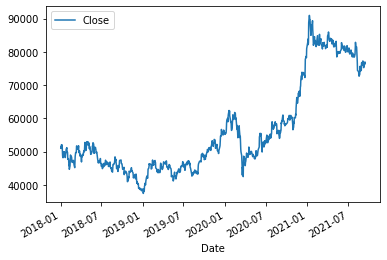

In [ ]:
df1.plot('Date','Close')

In [ ]:
df1.columns = ['ds', 'y']

In [ ]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [ ]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.7)

prophet.fit(train)

In [ ]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,75866.790700,73907.793631,77742.689694
907,2021-09-04,64630.611540,62674.742732,66588.931320
908,2021-09-05,64827.018102,63056.465832,66688.508014
909,2021-09-06,76492.905832,74515.253093,78336.539954
910,2021-09-07,76971.062681,75061.350852,78998.879563
911,2021-09-08,77088.719956,75272.899710,78873.339030
912,2021-09-09,77269.344688,75379.665851,79324.552358
913,2021-09-10,77417.116125,75694.879233,79415.739511
914,2021-09-11,66180.794340,64359.733357,68131.310632
915,2021-09-12,66409.098235,64540.136528,68318.351406


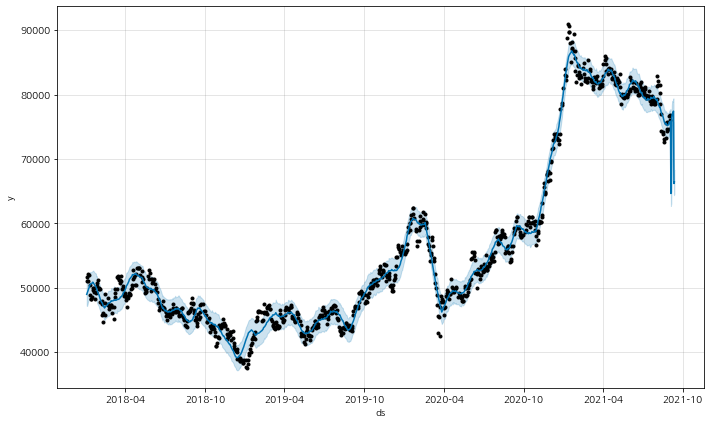

In [ ]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

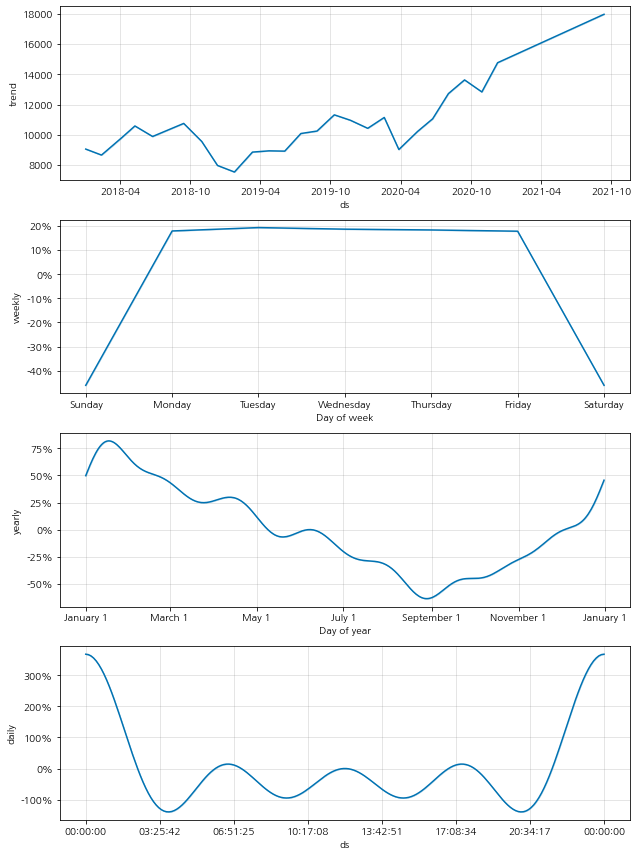

In [ ]:
fig2 = prophet.plot_components(forecast_data)

In [ ]:
# test
test.y.values

array([76600, 77300, 76100, 76300, 75300, 75300, 76300, 76600, 77000,
       76500])

Text(0.5, 1.0, '값 비교')

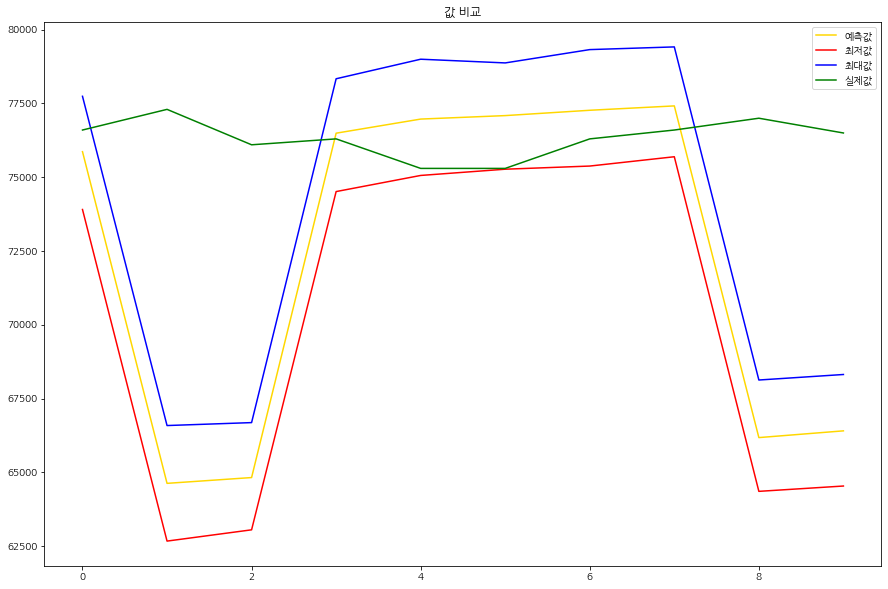

In [ ]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [ ]:
pred_fbprophet_y

array([75866.79070016, 64630.61154013, 64827.01810194, 76492.90583211,
       76971.06268085, 77088.71995585, 77269.34468797, 77417.11612487,
       66180.79433953, 66409.09823536])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

7173.904936329986


- 10일 _changepoint_prior_scale 파라미터 조정
  - 0.5 : 7068
  - 0.6 : 6676  <-
  - 0.7 : 7173  --- 이상 넘어가면 과적합